In [ ]:
from package_project import indicateurs_climat, preparation_data, cartes, indicateurs_tourisme
import pandas
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm

data_1 = pandas.read_csv("../Data/data_climat.csv")
data_2 = pandas.read_csv("../Data/data_tourisme.csv")

print(data_1.DEP.unique())
print(data_2.DEP.unique())

print(data_1.AAAA.unique())
print(data_2.AAAA.unique())

print(data_1.MM.unique())
print(data_2.MM.unique())

print(data_1.shape)
print(data_2.shape)

print(data_1.columns)
print(data_2.columns)

df = preparation_data.merge_data(data_1, data_2)

nul = df[df['OBS_VALUE_CORR'].isnull()]

print(nul.DEP.unique())
print(nul.AAAA.unique())
print(nul.MM.unique())


print(df.DEP.unique())




['01' '02' '03' '04' '05' '06' '07' '08' '09' '10' '11' '12' '13' '14'
 '15' '16' '17' '18' '19' '21' '22' '23' '24' '25' '26' '27' '28' '29'
 '30' '31' '32' '33' '34' '35' '36' '37' '38' '39' '40' '41' '42' '43'
 '44' '45' '46' '47' '48' '49' '50' '51' '52' '53' '54' '55' '56' '57'
 '58' '59' '60' '61' '62' '63' '64' '65' '66' '67' '68' '69' '70' '71'
 '72' '73' '74' '75' '76' '77' '78' '79' '80' '81' '82' '83' '84' '85'
 '86' '87' '88' '89' '90' '91' '92' '93' '94' '95' '2A' '2B']
['01' '02' '03' '04' '05' '06' '07' '08' '09' '10' '11' '12' '13' '14'
 '15' '16' '17' '18' '19' '21' '22' '23' '24' '25' '26' '27' '28' '29'
 '2A' '2B' '30' '31' '32' '33' '34' '35' '36' '37' '38' '39' '40' '41'
 '42' '43' '44' '45' '46' '47' '48' '49' '50' '51' '52' '53' '54' '55'
 '56' '57' '58' '59' '60' '61' '62' '63' '64' '65' '66' '67' '68' '69'
 '70' '71' '72' '73' '74' '75' '76' '77' '78' '79' '80' '81' '82' '83'
 '84' '85' '86' '87' '88' '89' '90' '91' '92' '93' '94' '95']
[2011 2012 2013 2014 201

- la France est un pays avec une grande variabilité climatique sur le territoire

In [2]:
# parametres
mois_ete = [6, 7, 8, 9]
mois_hiver = [1,2,3,12]
toutes_annees = [i for i in range(2011, 2023)]


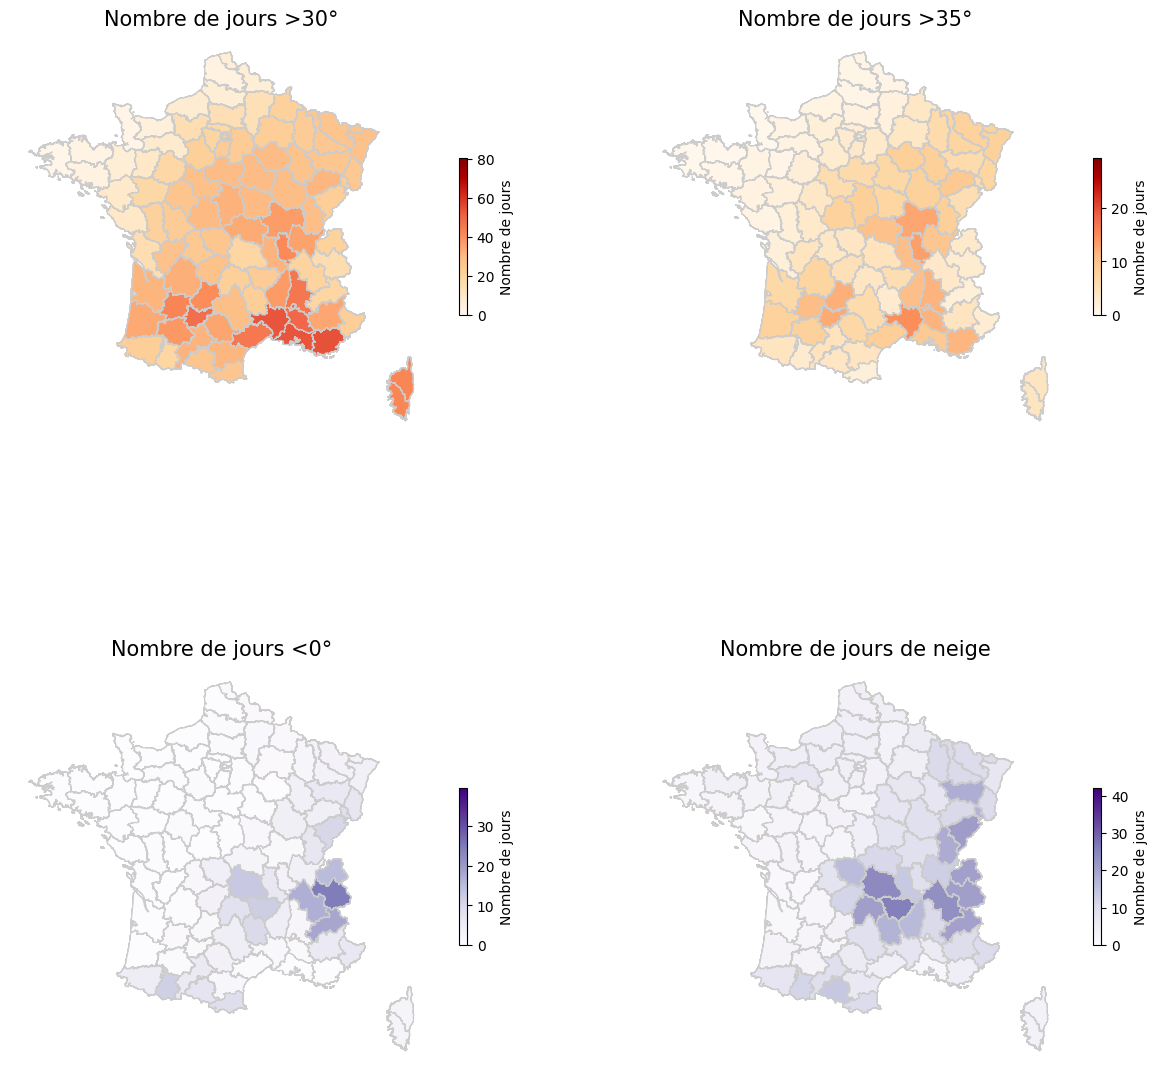

In [3]:
# TEMPS APPROXIMATIF : 40sec
# construction des cartes 

fig, ax = plt.subplots(2,2, figsize=(15, 15))

# été : nombre de jours à plus de 30 degrés et 35 degrés  
cartes.mise_en_forme_carte(
            cartes.donnee_carte(indicateurs_climat.nbj_par_an(df, toutes_annees, mois_ete, "NBJTX30")),
            toutes_annees,
            mois_ete,
            "NBJTX30",
            "Nombre de jours >30°",
            ax[0,0],
            evolution = False)

cartes.mise_en_forme_carte(
            cartes.donnee_carte(indicateurs_climat.nbj_par_an(df, toutes_annees, mois_ete, "NBJTX35")),
            toutes_annees,
            mois_ete,
            "NBJTX35",
            "Nombre de jours >35°",
            ax[0,1],
            evolution = False)

# # hiver : nombre de jours à moins de 0° ou de neige  

cartes.mise_en_forme_carte(
            cartes.donnee_carte(indicateurs_climat.nbj_par_an(df, toutes_annees, mois_hiver, "NBJTX0")),
            toutes_annees,
            mois_hiver,
            "NBJTX0",
            "Nombre de jours <0°",
            ax[1,0],
            evolution = False)

cartes.mise_en_forme_carte(
            cartes.donnee_carte(indicateurs_climat.nbj_par_an(df, toutes_annees, mois_hiver, "NBJNEIG")),
            toutes_annees,
            mois_hiver,
            "NBJNEIG",
            "Nombre de jours de neige",
            ax[1,1],
            evolution = False)



- tendance au réchauffement, marquée sur les années 2010

In [4]:
# GIF DE SORO

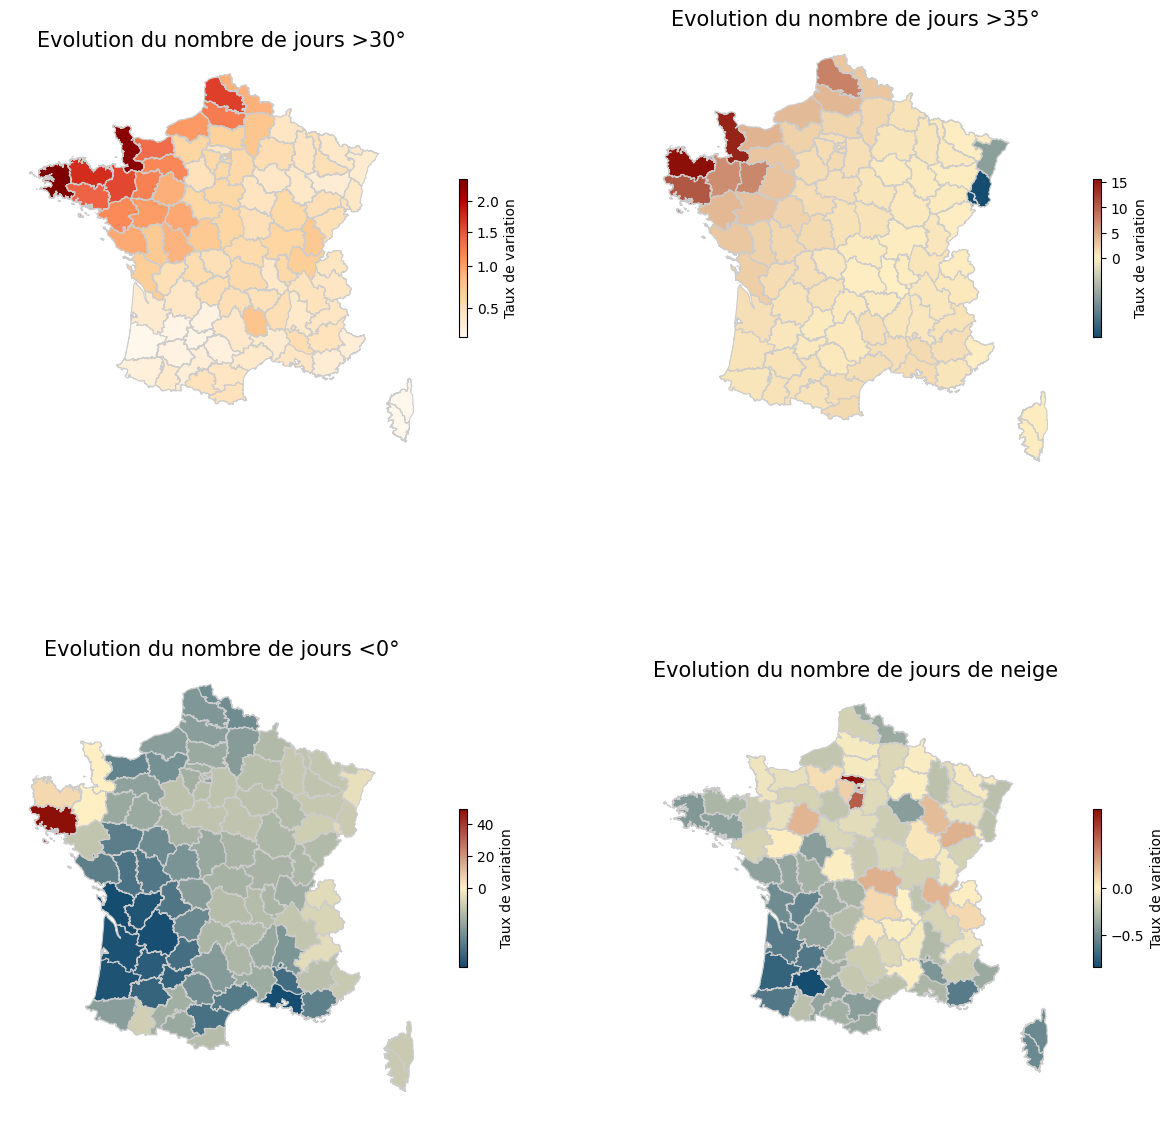

In [5]:
# évolution des évènements extremes 

fig, ax = plt.subplots(2,2, figsize=(15, 15))

# été : nombre de jours à plus de 30 degrés et 35 degrés  

cartes.mise_en_forme_carte(
            cartes.donnee_carte(indicateurs_climat.nbj_evol_2015(df, "été", "NBJTX30")),
            toutes_annees,
            mois_ete,
            "NBJTX30",
            "Evolution du nombre de jours >30°",
            ax[0,0],
            evolution = True)

cartes.mise_en_forme_carte(
            cartes.donnee_carte(indicateurs_climat.nbj_evol_2015(df, "été", "NBJTX35")),
            toutes_annees,
            mois_ete,
            "NBJTX35",
            "Evolution du nombre de jours >35°",
            ax[0,1],
            evolution = True)

# # hiver : nombre de jours à moins de 0° ou de neige  

cartes.mise_en_forme_carte(
            cartes.donnee_carte(indicateurs_climat.nbj_evol_2015(df, "hiver", "NBJTX0")),
            toutes_annees,
            mois_hiver,
            "NBJTX0",
            "Evolution du nombre de jours <0°",
            ax[1,0],
            evolution = True)

cartes.mise_en_forme_carte(
            cartes.donnee_carte(indicateurs_climat.nbj_evol_2015(df, "hiver", "NBJNEIG")),
            toutes_annees,
            mois_hiver,
            "NBJNEIG",
            "Evolution du nombre de jours de neige",
            ax[1,1],
            evolution = True)

- le tourisme est une activité qui dépend bcp du climat/météo

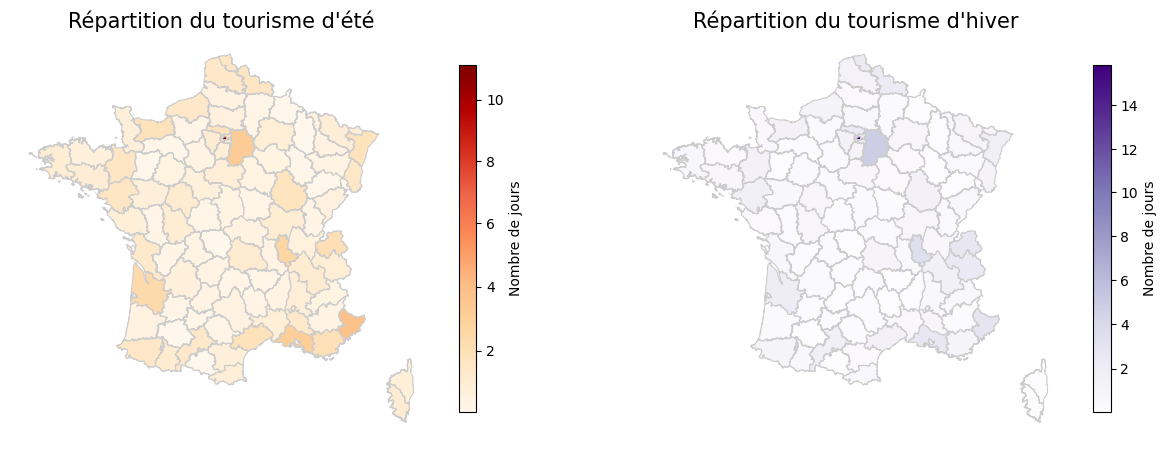

In [6]:
# tourisme 
mois_hiver = [1,2,3]
fig, ax = plt.subplots(1,2, figsize=(15, 15))

cartes.mise_en_forme_carte(
            cartes.donnee_carte(indicateurs_tourisme.repartition_arrivees(df, toutes_annees, mois_ete, ["DEP"])),
            toutes_annees,
            mois_ete,
            "part_tourisme",
            "Répartition du tourisme d'été",
            ax[0],
            evolution = False)

cartes.mise_en_forme_carte(
            cartes.donnee_carte(indicateurs_tourisme.repartition_arrivees(df, toutes_annees, mois_hiver, ["DEP"])),
            toutes_annees,
            mois_hiver,
            "part_tourisme",
            "Répartition du tourisme d'hiver",
            ax[1],
            evolution = False)



In [7]:
annees = toutes_annees
mois=mois_ete
par_groupe=["DEP"]

data = pandas.DataFrame(df.loc[df['AAAA'].isin(annees)].loc[df['MM'].isin(mois)].loc[~df["DEP"].isin([75,77,78,91,92,93,94,95])].groupby(par_groupe)["OBS_VALUE_CORR"].sum())
print(data.head())
data = data.reset_index()
print(data.head())

# print(data.OBS_VALUE_CORR.sum())

data["part_tourisme"] = ((data.OBS_VALUE_CORR / data.OBS_VALUE_CORR.sum()))*100
print(data.head())


     OBS_VALUE_CORR
DEP                
01        3624560.0
02        1582290.0
03        2884280.0
04        2400170.0
05        2619390.0
  DEP  OBS_VALUE_CORR
0  01       3624560.0
1  02       1582290.0
2  03       2884280.0
3  04       2400170.0
4  05       2619390.0
  DEP  OBS_VALUE_CORR  part_tourisme
0  01       3624560.0       0.670829
1  02       1582290.0       0.292848
2  03       2884280.0       0.533819
3  04       2400170.0       0.444221
4  05       2619390.0       0.484794


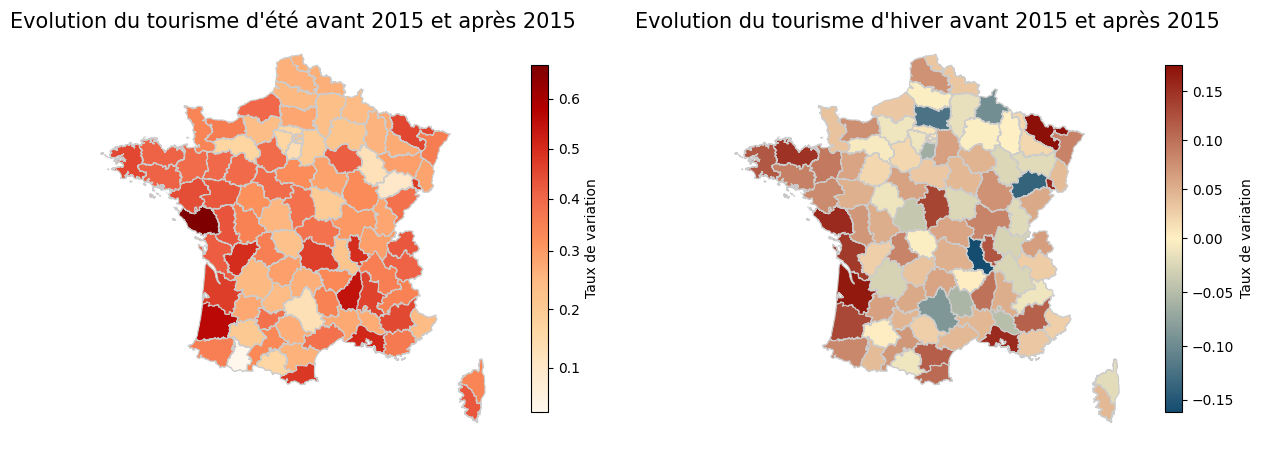

In [8]:
fig, ax = plt.subplots(1,2, figsize=(15, 15))

cartes.mise_en_forme_carte(
            cartes.donnee_carte(indicateurs_tourisme.evol_arrivees(df, mois_ete)),
            toutes_annees,
            mois_ete,
            "evol_2015",
            "Evolution du tourisme d'été avant 2015 et après 2015",
            ax[0],
            evolution = True)

cartes.mise_en_forme_carte(
            cartes.donnee_carte(indicateurs_tourisme.evol_arrivees(df, mois_hiver)),
            toutes_annees,
            mois_hiver,
            "evol_2015",
            "Evolution du tourisme d'hiver avant 2015 et après 2015",
            ax[1],
            evolution = True)

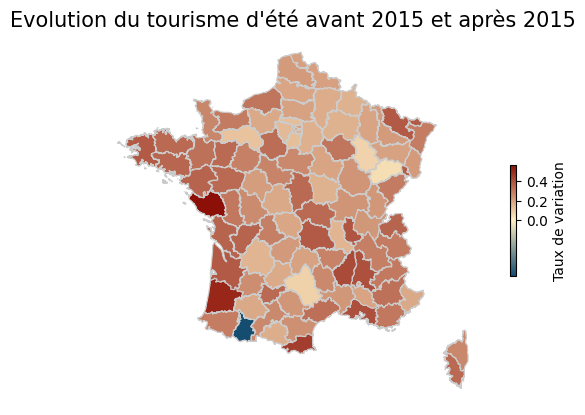

In [9]:
fig, ax = plt.subplots()

mois_ete=[6,9]

cartes.mise_en_forme_carte(
            cartes.donnee_carte(indicateurs_tourisme.evol_arrivees(df, mois_ete)),
            toutes_annees,
            mois_ete,
            "evol_2015",
            "Evolution du tourisme d'été avant 2015 et après 2015",
            ax,
            evolution = True)

Nous allons calculer le coefficient de corrélation global avant de s'intéresser aux coefficients de corrélation par département et par saison

In [10]:
col_arrivees = "OBS_VALUE_CORR"
col_temp = "TX"

base_clean = df.dropna(subset=[col_arrivees, col_temp]).copy()

corr_global = base_clean[col_arrivees].corr(base_clean[col_temp], method="pearson")
print("Corrélation globale arrivées / TX :", corr_global)

Corrélation globale arrivées / TX : 0.15050792411649302


Nous calculons le coefficient de corrélation linéaire de Pearson entre le nombre d'arrivée touristiques (OBS_VALUE_CORR) et la température maximale moyenne mensuelle (TX) sur l'ensemble des départements et des périodes. 
Le coefficient de corrélation globale est 0.15, ce qui traduit un lien positif mais faible entre les deux variables : les hausses de températures s'accompagnent en moyenne d'une légère hausse des arrivées, sans que le climat ne soit le déterminant principal des flux. 

Nous qualifions de forte une corrélation lorsque |r|≥0.5 et nous affichons uniquement les départements présentant une corrélation fortement positive (r≥0.5) ou fortement négative (r≤−0,5).

In [11]:
# Par Département
corr_par_dep = (
    base_clean
    .groupby("DEP")[[col_arrivees, col_temp]] 
    .apply(lambda g: g[col_arrivees].corr(g[col_temp], method="pearson"))
    .reset_index(name="corr_arrivees_TX")
)

dep_corr_forte_pos = corr_par_dep[corr_par_dep["corr_arrivees_TX"] >= 0.75]
liste_dep_forte_positive = corr_par_dep.loc[corr_par_dep["corr_arrivees_TX"] >= 0.75, "DEP"].tolist()
dep_corr_forte_neg = corr_par_dep[corr_par_dep["corr_arrivees_TX"] <= -0.5]

print("Départements à corrélation fortement POSITIVE :")
print(dep_corr_forte_pos)
print(liste_dep_forte_positive)

print("\nDépartements à corrélation fortement NÉGATIVE :")
print(dep_corr_forte_neg)

Départements à corrélation fortement POSITIVE :
   DEP  corr_arrivees_TX
0   01          0.751577
1   02          0.775208
2   03          0.902564
3   04          0.942587
5   06          0.916734
..  ..               ...
84  84          0.945596
85  85          0.933225
86  86          0.779979
87  87          0.894532
89  89          0.934282

[73 rows x 2 columns]
['01', '02', '03', '04', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '21', '22', '23', '24', '25', '26', '27', '28', '29', '2A', '2B', '30', '32', '33', '34', '35', '36', '37', '39', '40', '41', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '54', '55', '56', '58', '60', '61', '62', '63', '64', '65', '66', '71', '72', '76', '79', '80', '81', '82', '83', '84', '85', '86', '87', '89']

Départements à corrélation fortement NÉGATIVE :
   DEP  corr_arrivees_TX
73  73           -0.5952


In [12]:
# Par Saison
corr_par_saison = (
    base_clean
    .groupby("saison")[[col_arrivees, col_temp]] 
    .apply(lambda g: g[col_arrivees].corr(g[col_temp], method="pearson"))
    .reset_index(name="corr_arrivees_TX")
)

print("\nCorrélation arrivées / TX par saison :")
print(corr_par_saison)

# Par Période
corr_par_periode = (
    base_clean
    .groupby("periode")[[col_arrivees, col_temp]] 
    .apply(lambda g: g[col_arrivees].corr(g[col_temp], method="pearson"))
    .reset_index(name="corr_arrivees_TX")
)

print("\nCorrélation arrivées / TX par période :")
print(corr_par_periode)



Corrélation arrivées / TX par saison :
  saison  corr_arrivees_TX
0  hiver          0.014088
1    été          0.056232

Corrélation arrivées / TX par période :
      periode  corr_arrivees_TX
0  apres_2015          0.140552
1  avant_2015          0.162793


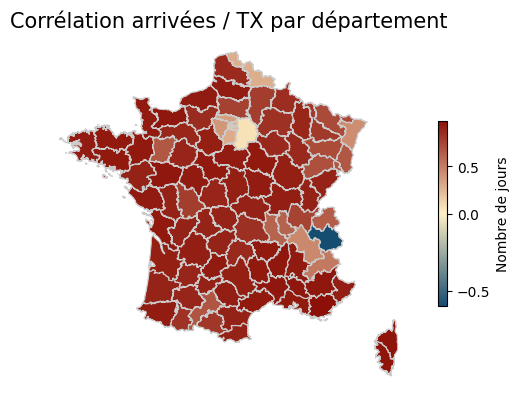

In [13]:
corr_dep = corr_par_dep.copy()
corr_dep["DEP"] = corr_dep["DEP"].astype(str).str.zfill(2)

annees = toutes_annees
mois=mois_ete
fig, ax = plt.subplots(figsize=(6, 8))

cartes.mise_en_forme_carte(
    cartes.donnee_carte(corr_dep),
    annees=toutes_annees,
    mois=mois_ete,
    indicateur= "corr_arrivees_TX", 
    titre_carte= "Corrélation arrivées / TX par département", 
    plotting=ax, 
    evolution=False
)